#                Bank Telemarketing Campaign Analysis

## Importing Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Importing the DataSet

In [3]:
df=pd.read_csv('bank-full.csv',sep=';')

In [6]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
summary=df.describe()

In [5]:
summary

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Finding the Missing value

In [13]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [11]:
def categorical_variable1(dataframe):
    variable_name=[i for i in dataframe.columns if dataframe.dtypes[i]=='object']
    for x in variable_name:
        print (dataframe[x].value_counts())
    


In [12]:
categorical_variable1(df)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

## Imputation of Missing Value

In [15]:
df['job']=df['job'].replace('unknown',df['job'].mode()[0])

In [16]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [17]:
df['education'] = df.groupby('job').transform(lambda x: x.replace('unknown',x.mode()[0]))["education"] 

In [18]:
df['education'].value_counts()

secondary    24657
tertiary     13658
primary       6896
Name: education, dtype: int64

#### Since around 81 & 28 % data are Unknown in poutcome and contact respectively, we are treating Unknown itself as a value

## Convertion of Object into Category type

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
cat_column=df.select_dtypes(include='object').columns
df[cat_column]=df[cat_column].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
y            45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Visualization of Categorical Variable

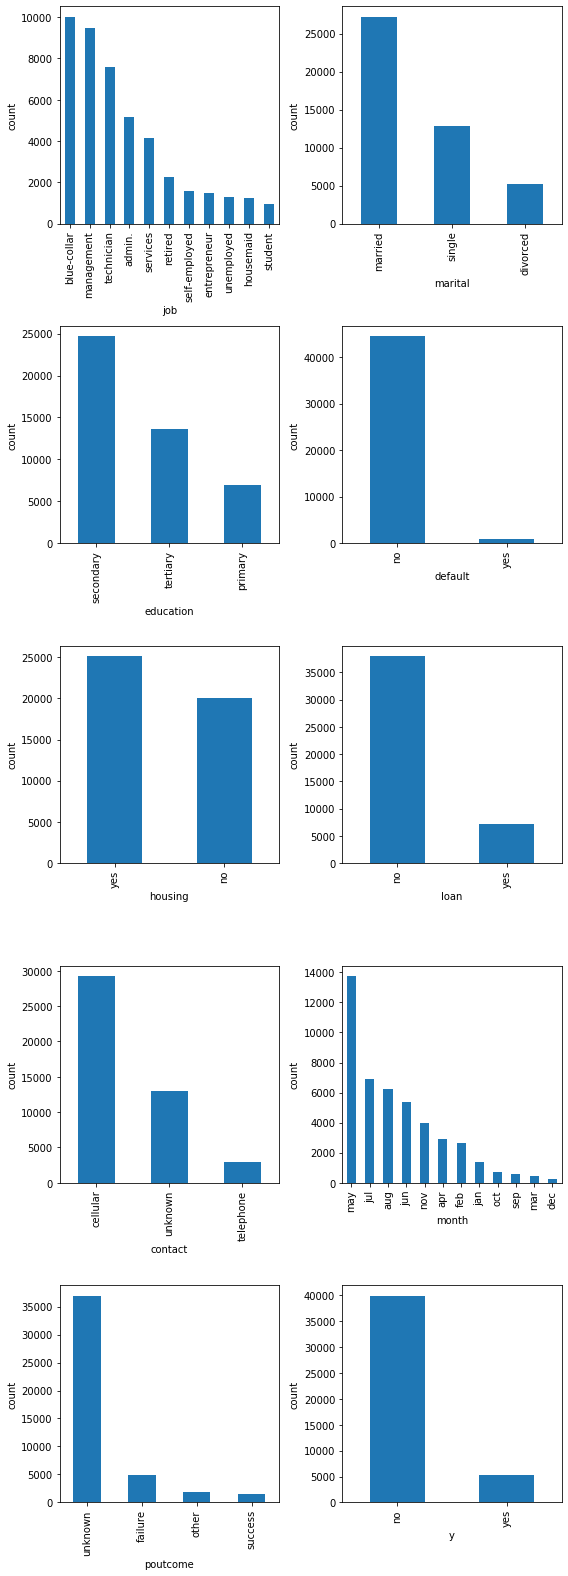

In [24]:
plt.figure(figsize=(8,22))
i=1
for c in cat_column:
    plt.subplot(5,2,i)
    df[c].value_counts().plot.bar()
    i+=1
    plt.xlabel(c)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

## Visualization of Continuous Variable

In [35]:
skewness=df.skew()
skewness

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

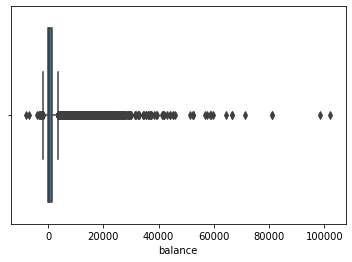

In [25]:
sns.boxplot(df['balance'])

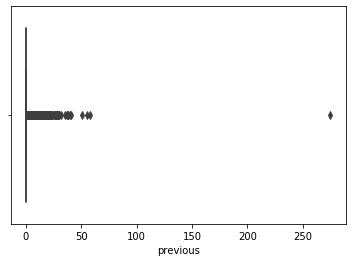

In [26]:
sns.boxplot(df['previous'])

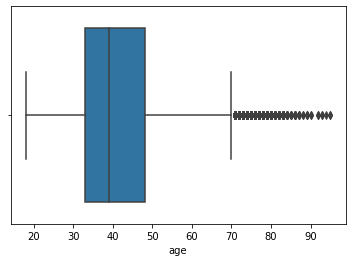

In [27]:
sns.boxplot(df['age'])

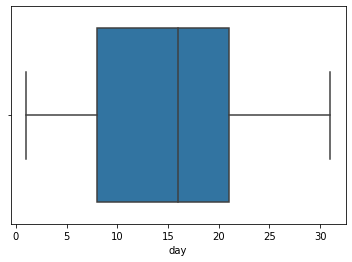

In [28]:
sns.boxplot(df['day'])

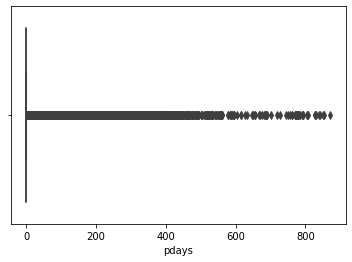

In [29]:
sns.boxplot(df['pdays'])

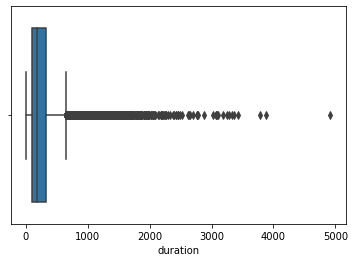

In [30]:
sns.boxplot(df['duration'])

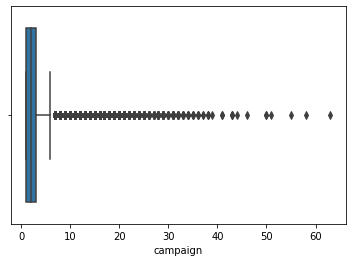

In [31]:
sns.boxplot(df['campaign'])

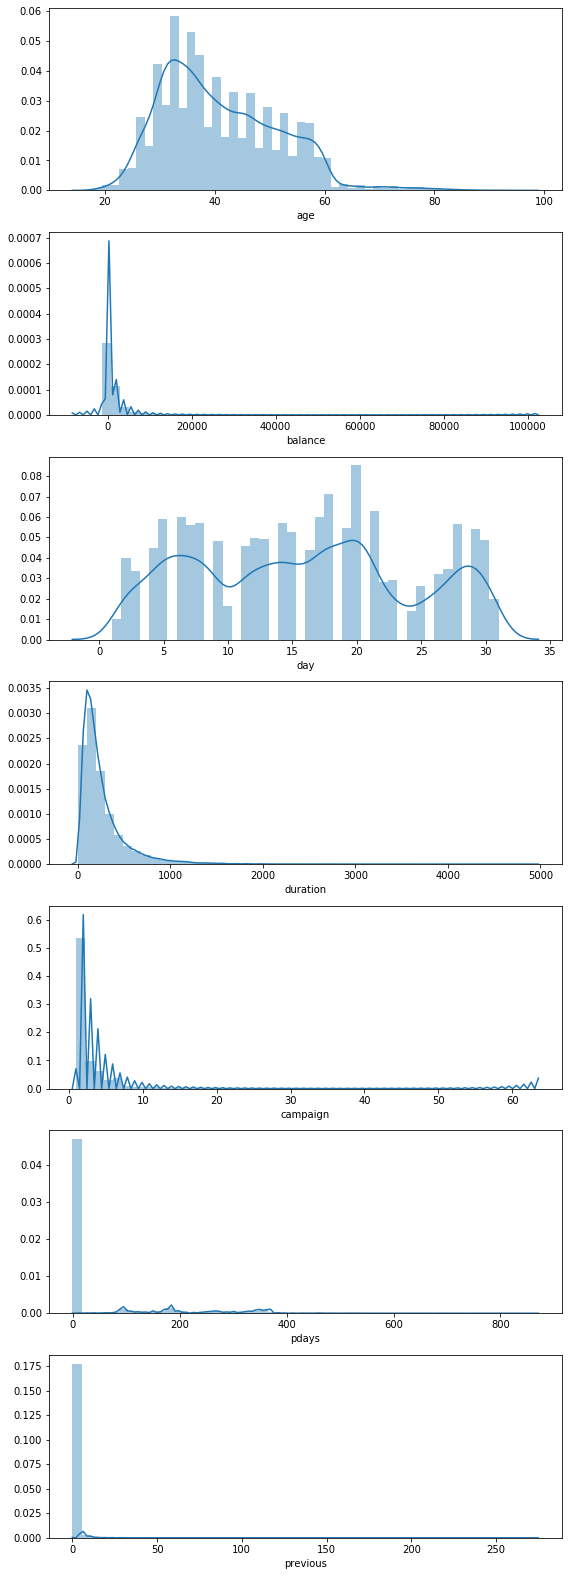

In [32]:
num_column=df.select_dtypes(include='int64').columns
plt.figure(figsize=(8,22))
i=1
for c in num_column:
    plt.subplot(7,1,i)
    sns.distplot(df[c])
    i+=1
    
plt.tight_layout()
plt.show()

## Pair Plot of Numeric Variable with Y

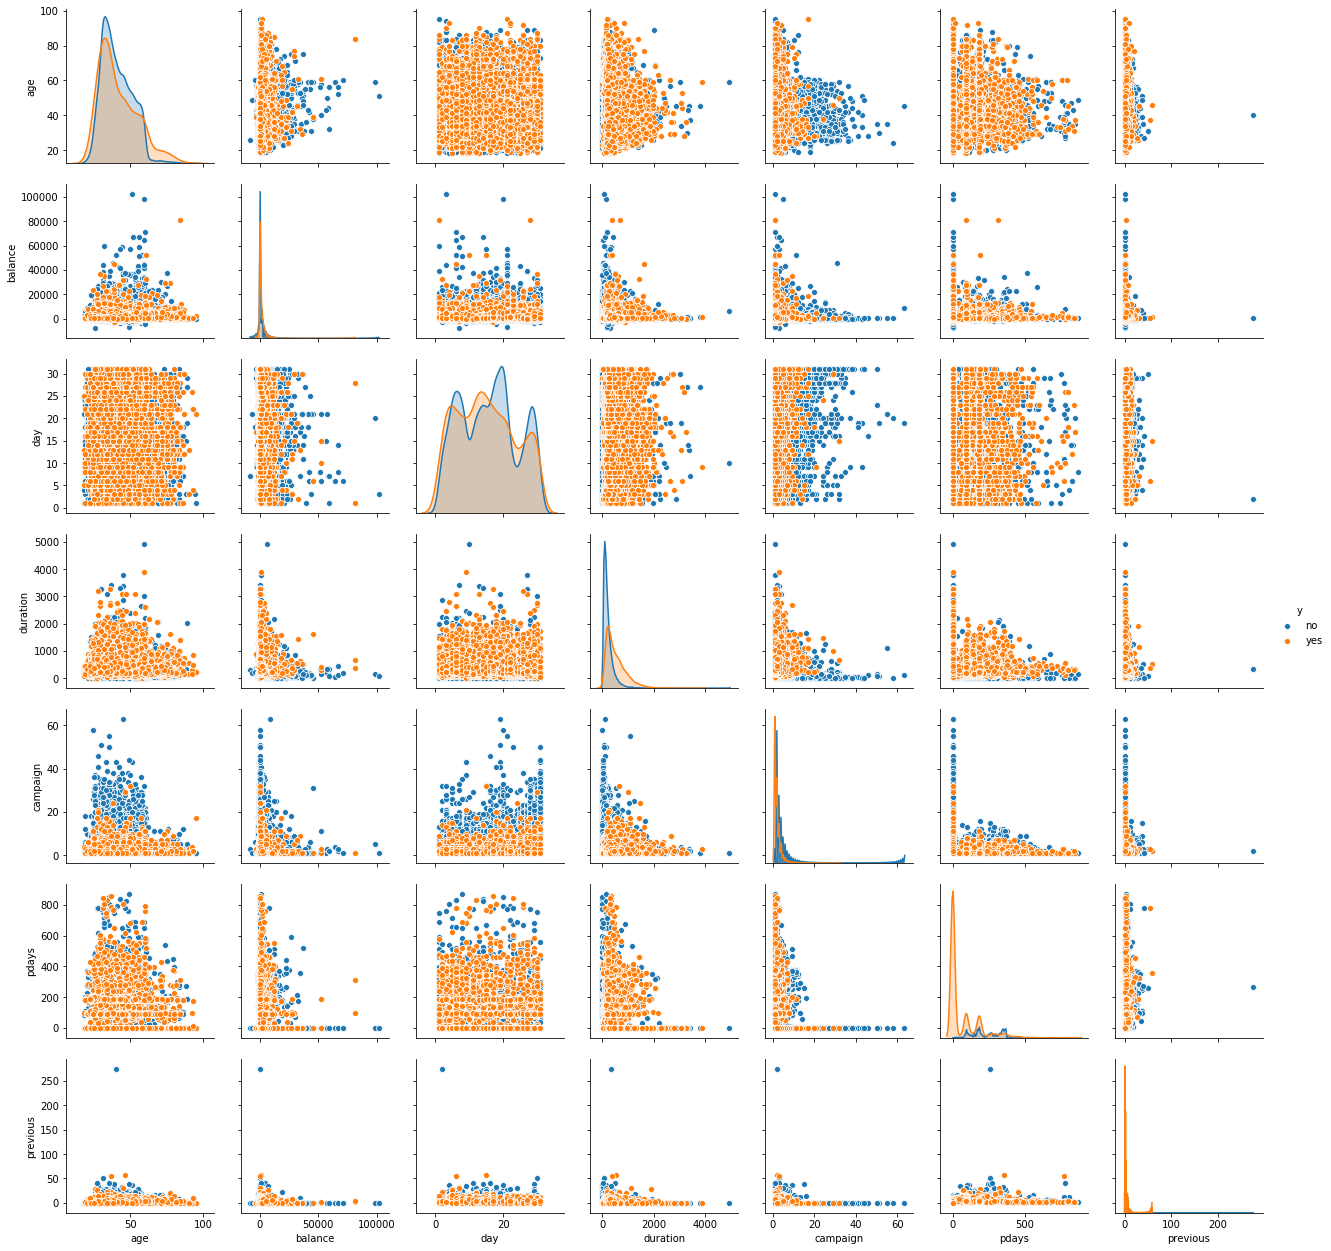

In [33]:
sns.pairplot(df,hue='y')
plt.show()

## Correlation

In [37]:
correlation=df.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Correlation Using Heat Map

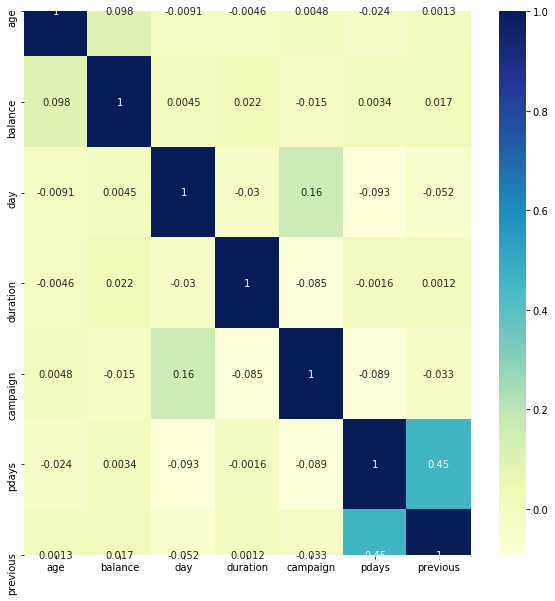

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

### Correlation of Categorical with Y

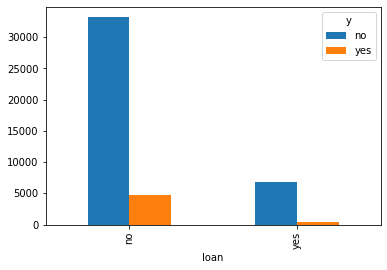

In [44]:
tbl1=pd.crosstab(df['loan'],df['y'])
chiq1=chi2_contingency(tbl1)
tbl1.plot(kind='bar')

In [45]:
chiq1

(209.61698034978633,
 1.665061163492756e-47,
 1,
 array([[33525.4379244,  4441.5620756],
        [ 6396.5620756,   847.4379244]]))

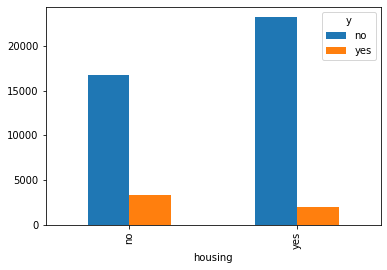

In [46]:
tbl2=pd.crosstab(df['housing'],df['y'])
chiq2=chi2_contingency(tbl2)
tbl2.plot(kind='bar')

In [47]:
chiq2

(874.822448867983,
 2.918797605076633e-192,
 1,
 array([[17731.82813917,  2349.17186083],
        [22190.17186083,  2939.82813917]]))

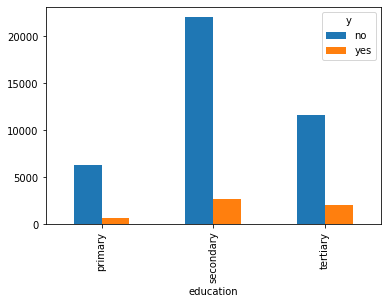

In [48]:
tbl3=pd.crosstab(df['education'],df['y'])
chiq3=chi2_contingency(tbl3)
tbl3.plot(kind='bar')

In [49]:
chiq3

(235.6066187525242,
 6.897199498466207e-52,
 2,
 array([[ 6089.2727876 ,   806.7272124 ],
        [21772.5056734 ,  2884.4943266 ],
        [12060.22153901,  1597.77846099]]))

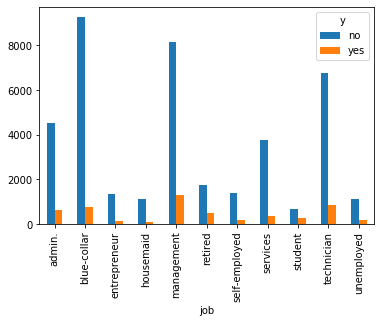

In [50]:
tbl4=pd.crosstab(df['job'],df['y'])
chiq4=chi2_contingency(tbl4)
tbl4.plot(kind='bar')

In [51]:
chiq4

(830.5472378863741,
 5.575427995540736e-172,
 10,
 array([[4566.0715755 ,  604.9284245 ],
        [8847.81225808, 1172.18774192],
        [1313.04359559,  173.95640441],
        [1094.93884232,  145.06115768],
        [8351.55771825, 1106.44228175],
        [1999.14640242,  264.85359758],
        [1394.28099356,  184.71900644],
        [3668.04512176,  485.95487824],
        [ 828.2682533 ,  109.7317467 ],
        [6708.26643958,  888.73356042],
        [1150.56879963,  152.43120037]]))

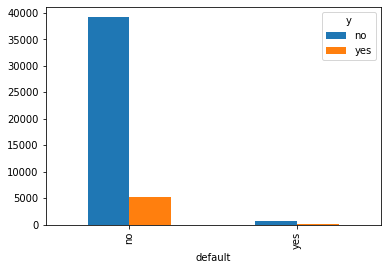

In [53]:
tbl5=pd.crosstab(df['default'],df['y'])
chiq5=chi2_contingency(tbl5)
tbl5.plot(kind='bar')

In [54]:
chiq5

(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,  5193.65738426],
        [  719.65738426,    95.34261574]]))

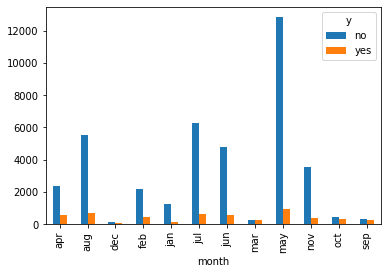

In [55]:
tbl6=pd.crosstab(df['month'],df['y'])
chiq6=chi2_contingency(tbl6)
tbl6.plot(kind='bar')

In [56]:
chiq6

(3061.838938445269, 0.0, 11, array([[ 2589.00055296,   342.99944704],
        [ 5516.19592577,   730.80407423],
        [  188.96525182,    25.03474818],
        [ 2339.10725266,   309.89274734],
        [ 1238.87031917,   164.12968083],
        [ 6088.3897724 ,   806.6102276 ],
        [ 4716.18415872,   624.81584128],
        [  421.19824821,    55.80175179],
        [12155.58718011,  1610.41281989],
        [ 3505.57032581,   464.42967419],
        [  651.66521422,    86.33478578],
        [  511.26579815,    67.73420185]]))

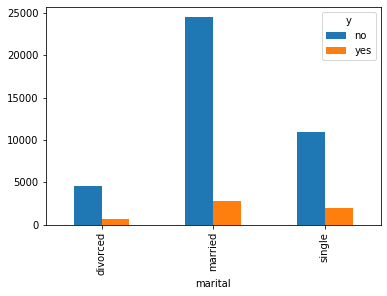

In [57]:
tbl7=pd.crosstab(df['marital'],df['y'])
chiq7=chi2_contingency(tbl7)
tbl7.plot(kind='bar')

In [58]:
chiq7

(196.49594565603957,
 2.1450999986791792e-43,
 2,
 array([[ 4597.86012254,   609.13987746],
        [24030.37552808,  3183.62447192],
        [11293.76434938,  1496.23565062]]))

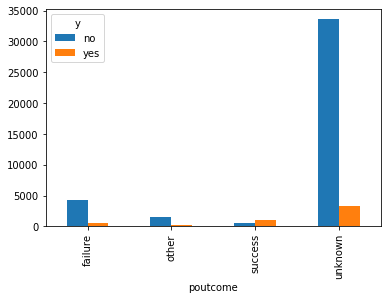

In [59]:
tbl8=pd.crosstab(df['poutcome'],df['y'])
chiq8=chi2_contingency(tbl8)
tbl8.plot(kind='bar')

In [60]:
chiq8

(4391.5065887686615, 0.0, 3, array([[ 4327.65747274,   573.34252726],
        [ 1624.74795957,   215.25204043],
        [ 1334.23596028,   176.76403972],
        [32635.35860742,  4323.64139258]]))

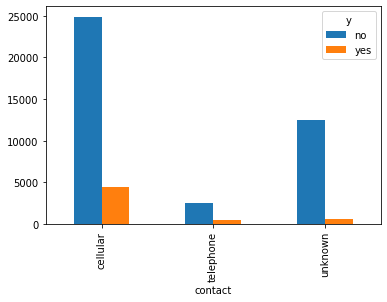

In [61]:
tbl9=pd.crosstab(df['contact'],df['y'])
chiq9=chi2_contingency(tbl9)
tbl9.plot(kind='bar')

In [62]:
chiq9

(1035.714225356292,
 1.251738325340638e-225,
 2,
 array([[25859.09999779,  3425.90000221],
        [ 2566.04215788,   339.95784212],
        [11496.85784433,  1523.14215567]]))

## Data Transformation - Categorical Variable

### One Hot Encoding

In [63]:
df=pd.get_dummies(df,columns=['job','marital','contact','poutcome'])

In [64]:
del df['job_unemployed']
del df['marital_divorced']
del df['contact_unknown']
del df['poutcome_unknown']

In [65]:
df.head(5)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,0,0,0,1,0,0,0,0,0,0
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,1,0,1,0,0,0,0,0
2,33,secondary,no,2,yes,yes,5,may,76,1,...,0,0,0,1,0,0,0,0,0,0
3,47,secondary,no,1506,yes,no,5,may,92,1,...,0,0,0,1,0,0,0,0,0,0
4,33,secondary,no,1,no,no,5,may,198,1,...,0,0,0,0,1,0,0,0,0,0


#### Changing Age into Categorical

In [66]:
category = pd.cut(df.age,bins=[0,19,30,50,70,99],labels=['AgeGroup1','AgeGroup2','AgeGroup3','AgeGroup4','AgeGroup5'])
df.insert(5,'Age Group',category)

In [67]:
df['Age Group'].value_counts()

AgeGroup3    28926
AgeGroup4     8768
AgeGroup2     6983
AgeGroup5      487
AgeGroup1       47
Name: Age Group, dtype: int64

In [68]:
del df['age']

#### Changing Month into categorical group

In [69]:
new_month={
        'jan':1,
        'feb':2,
        'mar':3,
        'apr':4,
        'may':5,
        'jun':6,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec':12
        }
df['new_month']=df['month'].map(new_month)

In [70]:
month = pd.cut(df.new_month,bins=[0,3,6,9,12],labels=['Season1','Season2','Season3','Season4'])
df.insert(8,'season',month)

In [71]:
del df['new_month']
del df['month']

### Label Encoding

In [72]:
le=LabelEncoder()

In [73]:
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['y']=le.fit_transform(df['y'])
df['Age Group']=le.fit_transform(df['Age Group'])
df['season']=le.fit_transform(df['season'])

### Data Splitting into X & Y

In [74]:
Y=df['y']
X=df.drop('y',axis=1)

### Data Splitting into X_train , Y_train , X_test , Y_test

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Model Creation

### Logistic Regression

In [76]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\daniel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting X_train, X_test

In [77]:
predict_y_train=model.predict(x_train)
predict_y_test=model.predict(x_test)

#### Confusion Matrix

In [78]:
cm_y_train=confusion_matrix(y_train,predict_y_train)
cm_y_test=confusion_matrix(y_test,predict_y_test)

In [79]:
cm_y_train

array([[31387,   549],
       [ 3374,   858]], dtype=int64)

In [80]:
cm_y_test

array([[7841,  145],
       [ 858,  199]], dtype=int64)

#### Accuracy Score

In [81]:
ac_y_train=accuracy_score(y_train,predict_y_train)
ac_y_test=accuracy_score(y_test,predict_y_test)

In [83]:
ac_y_train

0.8915339526653395

In [84]:
ac_y_test

0.8890854804821409

#### F1 Score

In [85]:
f1_score_y_train=f1_score(y_train,predict_y_train)
f1_score_y_test=f1_score(y_test,predict_y_test)

In [86]:
f1_score_y_train

0.3043092746940947

In [87]:
f1_score_y_test

0.28408279800142755

### Decision Tree

In [90]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Predicting X_train, X_test

In [91]:
predict_y_train_dt=dt.predict(x_train)
predict_y_test_dt=dt.predict(x_test)

#### Confusion Matrix

In [92]:
cm_y_train_dt=confusion_matrix(y_train,predict_y_train_dt)
cm_y_test_dt=confusion_matrix(y_test,predict_y_test_dt)

In [93]:
cm_y_train_dt

array([[31936,     0],
       [    0,  4232]], dtype=int64)

In [94]:
cm_y_test_dt

array([[7378,  608],
       [ 562,  495]], dtype=int64)

#### Accuracy Score

In [95]:
ac_y_train_dt=accuracy_score(y_train,predict_y_train_dt)
ac_y_test_dt=accuracy_score(y_test,predict_y_test_dt)

In [96]:
ac_y_train_dt

1.0

In [97]:
ac_y_test_dt

0.8706181576910318

#### F1 Score

In [98]:
f1_score_y_train_dt=f1_score(y_train,predict_y_train_dt)
f1_score_y_test_dt=f1_score(y_test,predict_y_test_dt)

In [99]:
f1_score_y_train_dt

1.0

In [100]:
f1_score_y_test_dt

0.45833333333333337

### Random Forest

In [101]:
rf=RandomForestClassifier(n_estimators=750)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predicting X_train, X_test

In [102]:
predict_y_train_rf=rf.predict(x_train)
predict_y_test_rf=rf.predict(x_test)

#### Confusion Matrix

In [103]:
cm_y_train_rf=confusion_matrix(y_train,predict_y_train_rf)
cm_y_test_rf=confusion_matrix(y_test,predict_y_test_rf)

In [104]:
cm_y_train_rf

array([[31936,     0],
       [    0,  4232]], dtype=int64)

In [105]:
cm_y_test_rf

array([[7801,  185],
       [ 667,  390]], dtype=int64)

#### Accuracy Score

In [106]:
ac_y_train_rf=accuracy_score(y_train,predict_y_train_rf)
ac_y_test_rf=accuracy_score(y_test,predict_y_test_rf)

In [107]:
ac_y_train_rf

1.0

In [108]:
ac_y_test_rf

0.905783478933982

#### F1 Score

In [109]:
f1_score_y_train_rf=f1_score(y_train,predict_y_train_rf)
f1_score_y_test_rf=f1_score(y_test,predict_y_test_rf)

In [110]:
f1_score_y_train_rf

1.0

In [111]:
f1_score_y_test_rf

0.4779411764705882

### SVM

In [112]:
sv=SVC()
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting X_train, X_test

In [113]:
predict_y_train_svm=sv.predict(x_train)
predict_y_test_svm=sv.predict(x_test)

#### Confusion Matrix

In [114]:
cm_y_train_svm=confusion_matrix(y_train,predict_y_train_svm)
cm_y_test_svm=confusion_matrix(y_test,predict_y_test_svm)

In [115]:
cm_y_train_svm

array([[31915,    21],
       [ 4200,    32]], dtype=int64)

In [116]:
cm_y_test_svm

array([[7983,    3],
       [1051,    6]], dtype=int64)

#### Accuracy Score

In [117]:
ac_y_train_svm=accuracy_score(y_train,predict_y_train_svm)
ac_y_test_svm=accuracy_score(y_test,predict_y_test_svm)

In [118]:
ac_y_train_svm

0.8832946250829462

In [119]:
ac_y_test_svm

0.8834457591507243

#### F1 Score

In [120]:
f1_score_y_train_svm=f1_score(y_train,predict_y_train_svm)
f1_score_y_test_svm=f1_score(y_test,predict_y_test_svm)

In [121]:
f1_score_y_train_svm

0.014935822637106185

In [122]:
f1_score_y_test_svm

0.011257035647279551

### Neural Network

In [123]:
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10), solver='adam', verbose=True, max_iter=300)
mlp.fit(x_train,y_train)

Iteration 1, loss = inf
Iteration 2, loss = 0.40718152
Iteration 3, loss = 0.36464208
Iteration 4, loss = 0.33941384
Iteration 5, loss = 0.32490807
Iteration 6, loss = 0.31245251
Iteration 7, loss = 0.31280607
Iteration 8, loss = 0.30717264
Iteration 9, loss = 0.29346688
Iteration 10, loss = 0.29558118
Iteration 11, loss = 0.29156743
Iteration 12, loss = 0.28715551
Iteration 13, loss = 0.28006394
Iteration 14, loss = 0.27984600
Iteration 15, loss = 0.27824932
Iteration 16, loss = 0.28823881
Iteration 17, loss = 0.27163379
Iteration 18, loss = 0.28894103
Iteration 19, loss = 0.26813338
Iteration 20, loss = 0.27598824
Iteration 21, loss = 0.26492509
Iteration 22, loss = 0.26814359
Iteration 23, loss = 0.27191760
Iteration 24, loss = 0.26465912
Iteration 25, loss = 0.26134305
Iteration 26, loss = 0.26028362
Iteration 27, loss = 0.25747486
Iteration 28, loss = 0.25911163
Iteration 29, loss = 0.26061605
Iteration 30, loss = 0.25933630
Iteration 31, loss = 0.26576982
Iteration 32, loss = 0.2

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

#### Predicting X_train, X_test

In [124]:
mlp_preds=mlp.predict(x_train)
mlp_test=mlp.predict(x_test)

#### Confusion Matrix

In [125]:
cm_train_mlp=confusion_matrix(y_train,mlp_preds)
cm_train_mlp_1=confusion_matrix(y_test,mlp_test)

In [126]:
cm_train_mlp

array([[31142,   794],
       [ 2870,  1362]], dtype=int64)

In [127]:
cm_train_mlp_1

array([[7796,  190],
       [ 740,  317]], dtype=int64)

#### Accuracy Score

In [128]:
ac_score_mlp=accuracy_score(y_train,mlp_preds)
ac_score_mlp_1=accuracy_score(y_test,mlp_test)

In [129]:
ac_score_mlp

0.8986949789869498

In [130]:
ac_score_mlp_1

0.8971580227800509

#### F1 Score

In [131]:
f1score_mlp=f1_score(y_train,mlp_preds)
f1score_mlp_1=f1_score(y_test,mlp_test)

In [132]:
f1score_mlp

0.4264245460237946

In [133]:
f1score_mlp_1

0.40537084398976986

## Final Results

Model                Train Accuracy	Train F1_Score	Test Accuracy	Test F1_Score
____________________________________________________________________________________
Logistic Regression	      0.89	         0.30	        0.88	         0.20
Decision Tree	          1.0	         1.0	        0.87	         0.45
Random Forest	          1.0          	 1.0         	0.90	         0.47
SVM	                      0.88	         0.01	        0.88	         0.01
Neural Network	          0.89	         0.42	        0.89	         0.40


Logistic Regression has Accuray of 0.88 and F1_Score of 0.20

Decision Tree has Accuracy of 1.0 and F1_Score of 0.45

Random Forest has Accuracy of 0.90 and F1_Score of 0.47

SVM has Accuracy of 0.88 and F1_Score of 0.01

Neural Network has Accuracy of 0.89 and F1_Score of 0.40

From the above , we can conclued that Random Forest gives a better result based on the F1_Score as well as Accuracy